[1] Используя make_blobs с любым random_state, сгенерировать датасет df1, в котором есть три класса с размером каждого класса 1000 и четыре количественных (недискретных) признака.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Генерация датасета df1 с 3 классами по 1000 объектов и 4 количественными признаками
num_class, num_points = 3, 1000
X, y = make_blobs(n_samples=num_class * num_points, centers=num_class, n_features=4, random_state=0)

# Создаем DataFrame
df1 = pd.DataFrame(X, columns=[f'Feature_{i + 1}' for i in range(4)])
df1['Class'] = y

[2] Не забываем повторять шаги с задания 1
- ключевые характеристики датасета
- корреляции
- визуализация на всех парах переменных

In [3]:
def show_plot(df, name):
    # Форма датасета
    dataset_shape = df.shape
    num_features = df.shape[1] - 1
    target_classes_count = df['Class'].value_counts()
    missing_percentage = df.isnull().mean() * 100

    # Вывод ключевых характеристик
    print("Описание датасета:")
    description = df.describe()
    print(
        f'Форма датасета: {dataset_shape}\n'
        f'Число признаков: {num_features}\n'
        f'Число объектов в каждом классе:\n{target_classes_count}\n'
        f'Процент пропущенных значений:\n{missing_percentage}\n'
    )
    print(description)

    # Корреляционная матрица
    print("\nКорреляционная матрица:")
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Корреляционная матрица для {name}')
    plt.show()

    # Визуализация парных распределений
    sns.pairplot(df, hue='Class', diag_kind='kde', palette='Set2')
    plt.suptitle(f'Попарные графики для {name}', y=1.02)
    plt.show()

Описание датасета:
Форма датасета: (3000, 5)
Число признаков: 4
Число объектов в каждом классе:
Class
1    1000
0    1000
2    1000
Name: count, dtype: int64
Процент пропущенных значений:
Feature_1    0.0
Feature_2    0.0
Feature_3    0.0
Feature_4    0.0
Class        0.0
dtype: float64

         Feature_1    Feature_2    Feature_3    Feature_4        Class
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000
mean      2.886732     1.615202     2.199980     3.087975     1.000000
std       4.728501     3.032537     3.046773     3.493286     0.816633
min      -4.653105    -5.928333    -4.175589    -2.494636     0.000000
25%      -0.936722    -1.695545    -0.578033     0.393178     0.000000
50%       0.968278     2.760219     2.030200     1.393745     1.000000
75%       8.563355     3.988266     5.126213     7.241278     2.000000
max      12.330357     6.966514     9.291680    10.838583     2.000000

Корреляционная матрица:


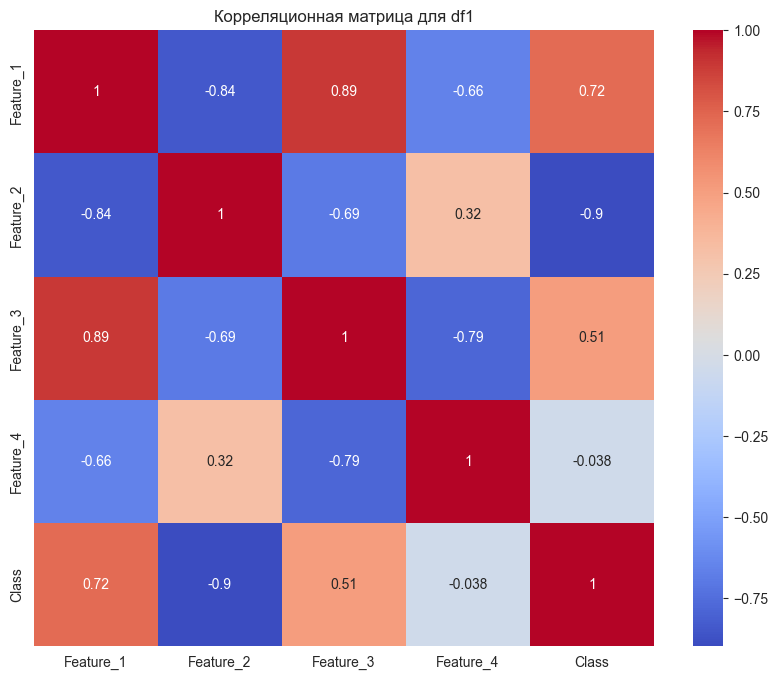

In [ ]:
show_plot(df1, "df1")

In [18]:
# Ключевые характеристики
key_stats = df1.describe()
print(key_stats)

         feature_1    feature_2    feature_3    feature_4        class
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000
mean     -2.538677     1.967795    -0.322164    -2.178905     1.000000
std       8.366860     6.739500     5.993477     5.189091     0.816633
min     -13.276081    -9.851627    -7.881116   -12.742092     0.000000
25%      -9.134792    -6.534201    -4.833433    -8.613832     0.000000
50%      -6.955448     4.765162    -3.803195     0.501432     1.000000
75%       8.405490     7.693191     7.357046     1.836441     2.000000
max      12.078280    11.883808    11.299771     5.654318     2.000000


In [19]:
# Корреляционная матрица
correlation_matrix = df1.corr()
print(correlation_matrix)

           feature_1  feature_2  feature_3  feature_4     class
feature_1   1.000000  -0.978719  -0.578634   0.686001  0.783244
feature_2  -0.978719   1.000000   0.640331  -0.738116 -0.726929
feature_3  -0.578634   0.640331   1.000000  -0.957923  0.029113
feature_4   0.686001  -0.738116  -0.957923   1.000000  0.116470
class       0.783244  -0.726929   0.029113   0.116470  1.000000


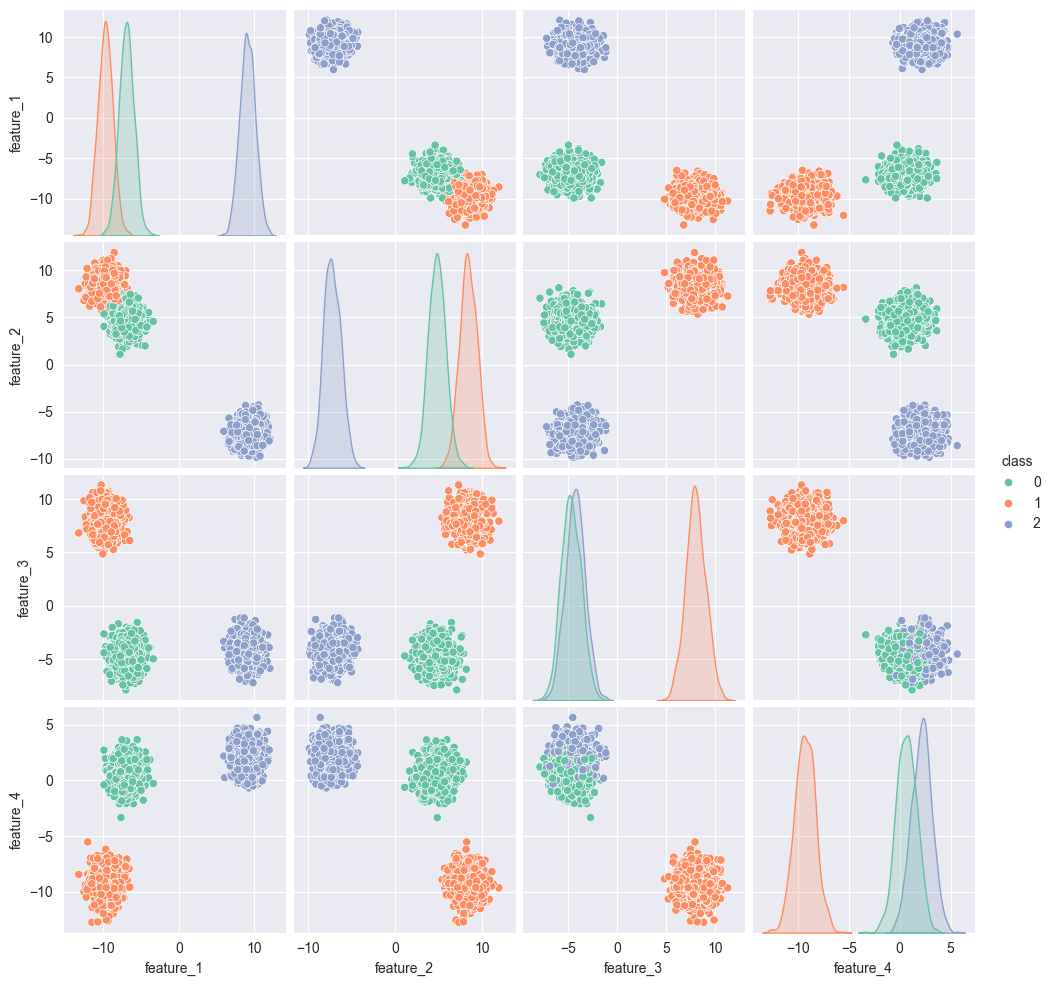

In [20]:
# Визуализация на всех парах переменных
sns.pairplot(df1, hue='class', palette='Set2')
plt.show()

[3] На основе созданного в пункте [1] датасета сгенерировать отдельные дополнительные датасеты (df2, df5, df10…), в которых объекты одного класса повторены 2 раза, 5 раз, 10 раз, 20 раз, 50 раз, 100 раз, 1000 раз, 10k раз, а количество объектов в остальных классов неизменно.


In [21]:
def generate_datasets(df, repetitions_list):
    datasets = {}
    for reps in repetitions_list:
        # Копируем исходные данные
        df_copy = df.copy()

        # Увеличиваем класс 0
        class_0 = df_copy[df_copy['class'] == 0]
        class_0_repeated = class_0.sample(reps, replace=True)

        # Объединяем с остальными классами
        df_repeated = pd.concat([class_0_repeated, df_copy[df_copy['class'] != 0]], ignore_index=True)

        # Перемешиваем данные
        df_repeated = df_repeated.sample(frac=1, random_state=random_state).reset_index(drop=True)

        datasets[f'df{reps}'] = df_repeated
    return datasets


# Список количества повторений
repetitions = [2, 5, 10, 20, 50, 100, 1000, 10000]
additional_datasets = generate_datasets(df1, repetitions)

In [22]:
# Пример отображения одного из дополнительных датасетов
print(additional_datasets['df2'])

      feature_1  feature_2  feature_3  feature_4  class
0      9.655502  -6.796717  -3.300689   3.370710      2
1    -10.716892   9.204466   6.433810  -9.111825      1
2    -12.354195   8.393251   8.081789  -9.886145      1
3    -10.434369   9.024242   7.774396  -9.877943      1
4      9.254507  -8.049467  -4.533078   4.109322      2
...         ...        ...        ...        ...    ...
1997   8.703872  -7.926658  -3.362370   1.572554      2
1998  -7.039064   9.952899   8.945516  -7.739926      1
1999  -8.982945  11.254052   8.660096  -9.305975      1
2000  10.897278  -6.529684  -4.164766   2.585389      2
2001   8.654024  -6.475984  -1.145909   2.475329      2

[2002 rows x 5 columns]


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

# 1. Генерация датасета df1
random_state = 42
X, y = make_blobs(n_samples=3000, centers=3, n_features=4, random_state=random_state)
df1 = pd.DataFrame(X, columns=[f'feature_{i + 1}' for i in range(X.shape[1])])
df1['class'] = y

# 2. Анализ датасета
# Ключевые характеристики
# key_stats = df1.describe()
# print("Ключевые характеристики датасета:")
# print(key_stats)

# Корреляции
correlation_matrix = df1.corr()


# print("\nКорреляционная матрица:")
# print(correlation_matrix)

# Визуализация на всех парах переменных
# sns.pairplot(df1, hue='class', palette='Set2')
# plt.show()


# 3. Генерация дополнительных датасетов
def generate_datasets(df, repetitions_list):
    datasets = {}
    for reps in repetitions_list:
        df_copy = df.copy()
        class_0 = df_copy[df_copy['class'] == 0]
        class_0_repeated = class_0.sample(reps, replace=True)
        df_repeated = pd.concat([class_0_repeated, df_copy[df_copy['class'] != 0]], ignore_index=True)
        df_repeated = df_repeated.sample(frac=1, random_state=random_state).reset_index(drop=True)
        datasets[f'df{reps}'] = df_repeated
    return datasets


# Список количества повторений
repetitions = [1, 2, 5, 10, 20, 50, 100, 1000, 10000]
additional_datasets = generate_datasets(df1, repetitions)

# Пример отображения одного из дополнительных датасетов
print("\nПример датасета df10:")
print(additional_datasets['df10'])
print("\nПример датасета df10000:")
print(additional_datasets['df10000'])


Пример датасета df10:
      feature_1  feature_2  feature_3  feature_4  class
0     -5.921633  -6.216564  -9.864409   7.704949      1
1     -4.794914  -7.888021  -9.178087   7.555130      1
2     -7.780218  -8.012895  -8.487958   6.479199      1
3     -7.789317  -6.120610  -9.455103   5.975527      1
4      2.118310   4.363526  -9.592512  11.103559      2
...         ...        ...        ...        ...    ...
2005   2.659208   3.686326 -10.121304  10.038100      2
2006  -9.003620  -6.466493  -6.702741   7.605557      1
2007  -6.772419  -7.198956  -8.211893   7.243614      1
2008  -7.735976  -7.491743  -7.719695   7.336566      1
2009  -4.491255  -5.695853  -8.115501   7.435322      1

[2010 rows x 5 columns]

Пример датасета df10000:
       feature_1  feature_2  feature_3  feature_4  class
0      -2.219423  11.089687   5.511004   1.647146      0
1      -1.914443   9.867702   5.398807   2.254361      0
2      -3.320198   7.900240   4.898540   2.185909      0
3      -2.344437   9.06517

[4] Выбрать пару классов (включая класс с повторенными объектами) и пару количественных признаков.  
Используя метод LDA (линейный дискриминантный анализ), для каждого из датасетов df1, df2, df5, df10, df20, df50, df100, df1000, df10k, построить решающую функцию алгоритма, разграниченные решающей функцией зоны и отдельные
объекты классов.

In [24]:
df = additional_datasets['df2']

# Выбор классов и признаков
classes_to_compare = [0]
features_to_use = ['feature_3', 'feature_4']

# Фильтруем только нужные классы
df_filtered = df[df['class'].isin(classes_to_compare)]
print(df_filtered)

df = additional_datasets['df1']

      feature_1  feature_2  feature_3  feature_4  class
1178  -2.165579   7.251246   4.963963   1.588087      0
1734  -3.026486  10.423634   6.938777   1.610331      0


In [25]:

# Выбор классов и признаков
classes_to_compare = [1]
features_to_use = ['feature_3', 'feature_4']

# Фильтруем только нужные классы
df_filtered = df[df['class'].isin(classes_to_compare)]
print(df_filtered)

      feature_1  feature_2  feature_3  feature_4  class
0     -5.343566  -6.282572  -9.549631   7.440647      1
1     -5.011024  -6.845302  -9.640527   6.176363      1
2     -6.942267  -6.636986  -9.132570   8.680106      1
3     -7.091717  -6.337907  -9.176206   7.325755      1
8     -6.404039  -8.627005  -9.377089   7.068576      1
...         ...        ...        ...        ...    ...
1990  -6.486993  -6.426524 -10.420551   7.373751      1
1992  -8.568132  -8.000157  -8.167417   7.927313      1
1994  -8.450780  -5.798596  -8.800786   8.415328      1
1996  -7.953316  -6.799027  -9.318976   9.862905      1
1997  -5.925542  -5.661629  -6.636314   6.967431      1

[1000 rows x 5 columns]


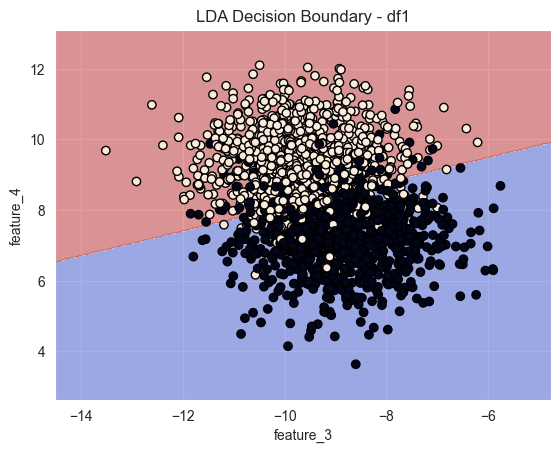

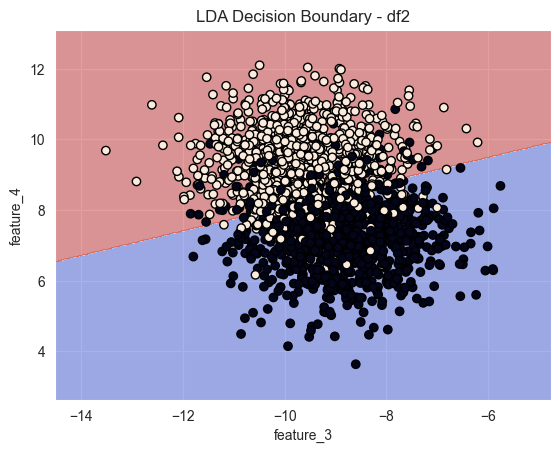

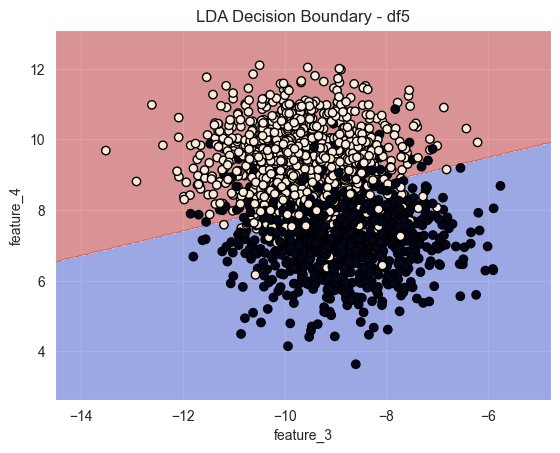

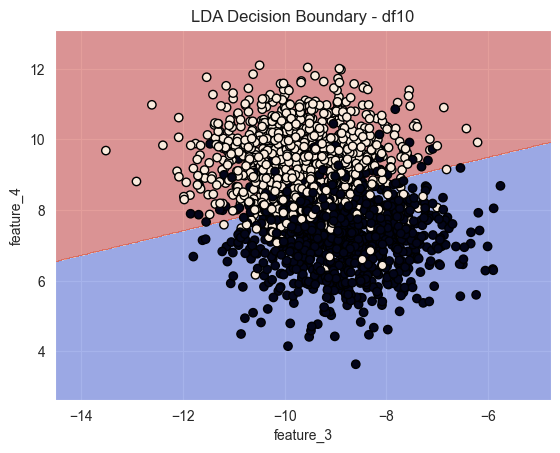

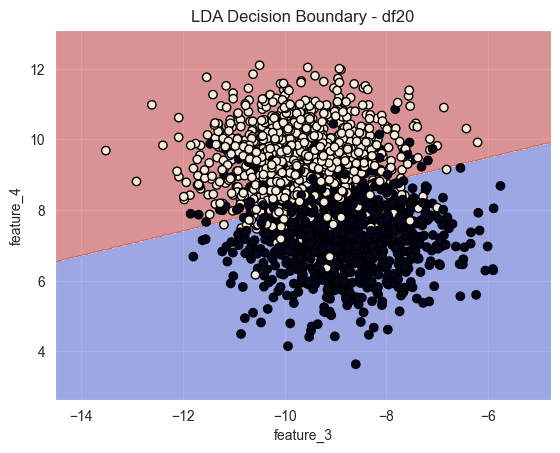

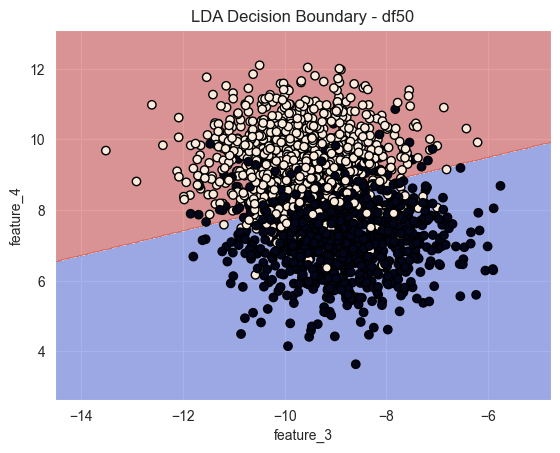

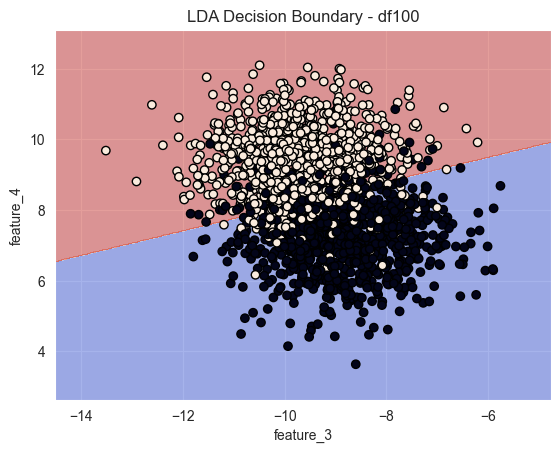

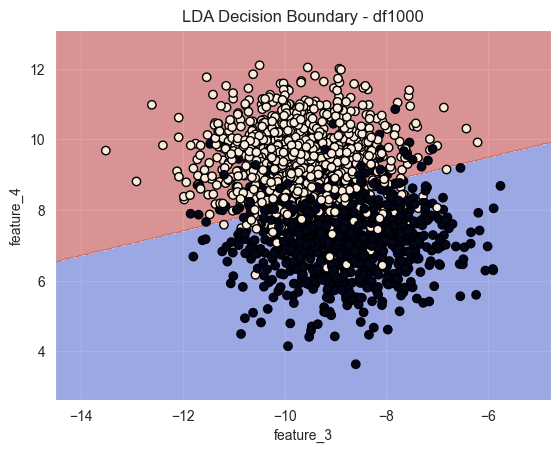

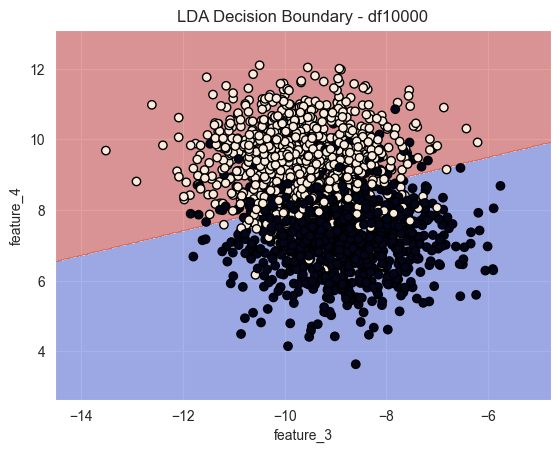

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('feature_3')
    plt.ylabel('feature_4')
    plt.show()


datasets_to_analyze = ['df1', 'df2', 'df5', 'df10', 'df20', 'df50', 'df100', 'df1000', 'df10000']

for name in datasets_to_analyze:
    df = additional_datasets[name]

    # Выбор классов и признаков
    classes_to_compare = [1, 2]
    features_to_use = ['feature_3', 'feature_4']

    # Фильтруем только нужные классы
    df_filtered = df[df['class'].isin(classes_to_compare)]

    X = df_filtered[features_to_use].values
    y = df_filtered['class'].values

    # LDA
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    plot_decision_boundary(lda, X, y, f'LDA Decision Boundary - {name}')

[5] Повторить пункт [4] для алгоритма SVM.

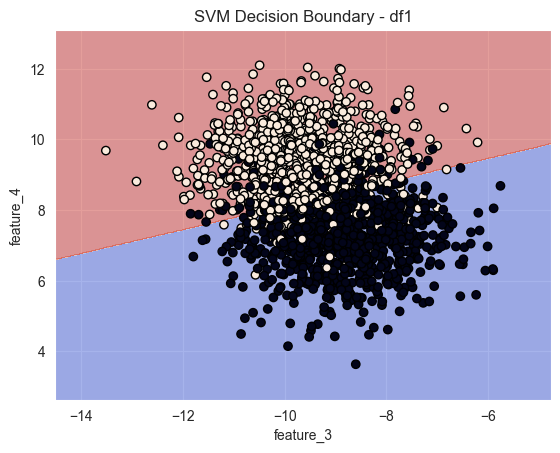

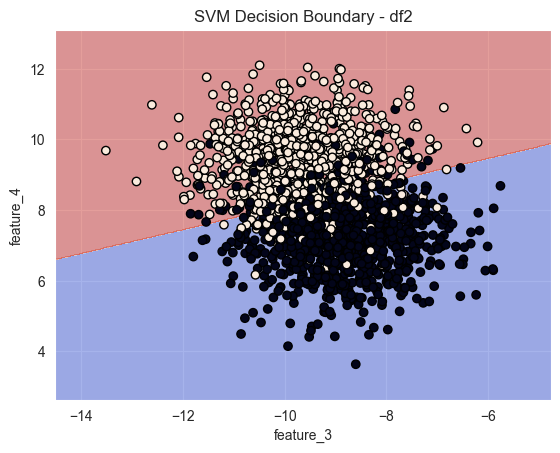

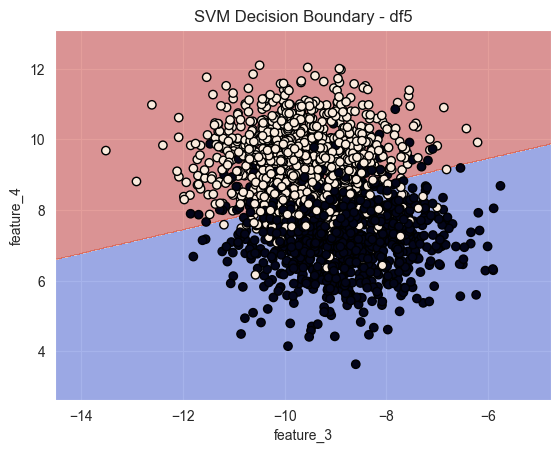

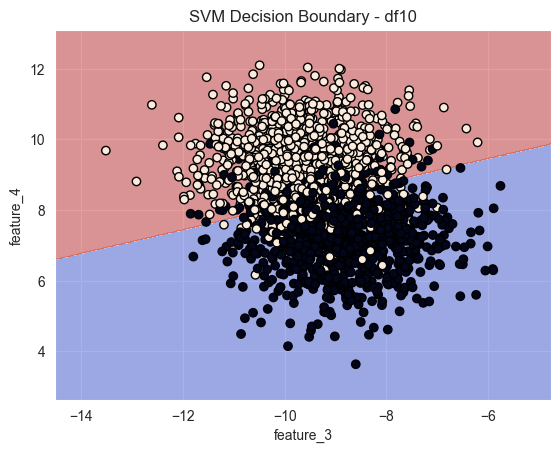

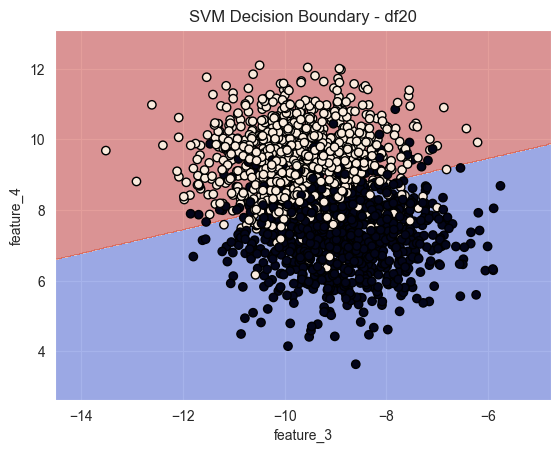

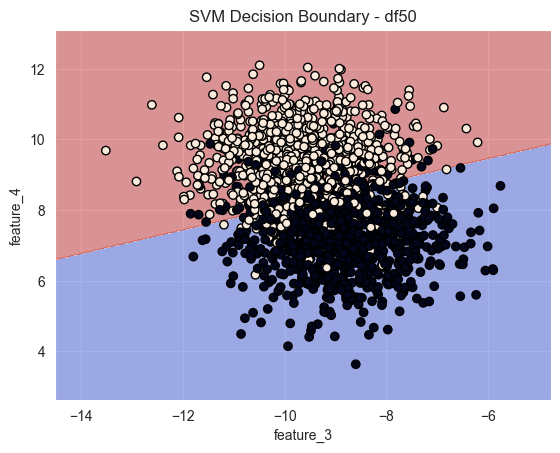

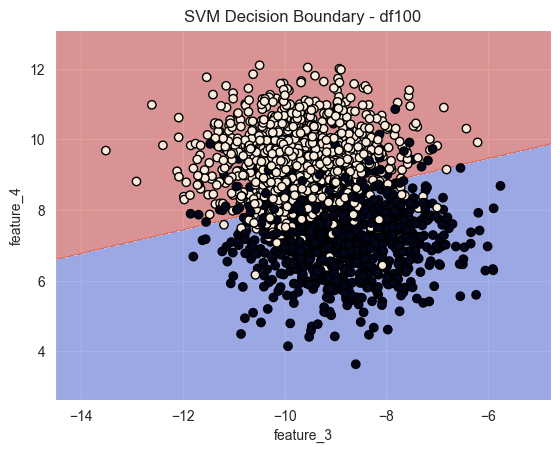

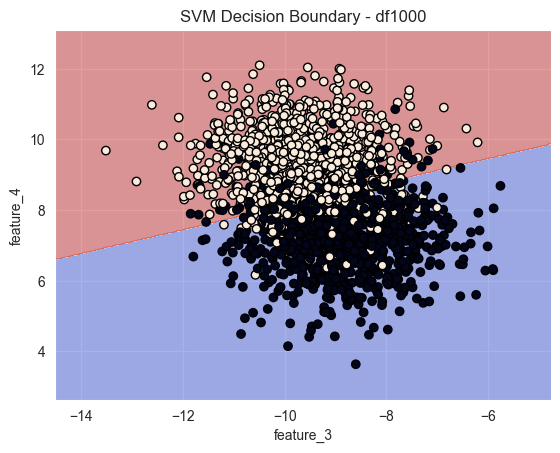

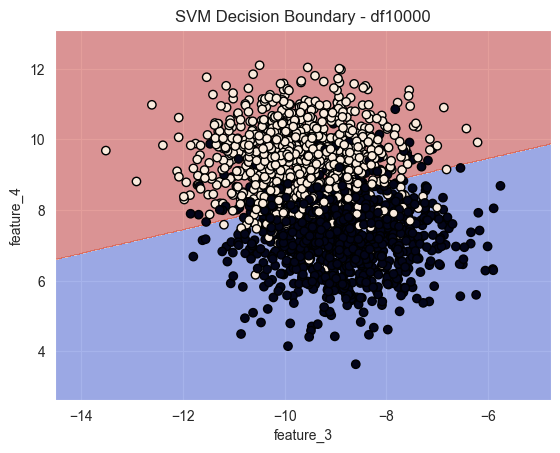

In [27]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('feature_3')
    plt.ylabel('feature_4')
    plt.show()


datasets_to_analyze = ['df1', 'df2', 'df5', 'df10', 'df20', 'df50', 'df100', 'df1000', 'df10000']

for name in datasets_to_analyze:
    df = additional_datasets[name]

    # Выбор классов и признаков
    classes_to_compare = [1, 2]  # Выбираем классы 1 и 2
    features_to_use = ['feature_3', 'feature_4']

    # Фильтруем только нужные классы
    df_filtered = df[df['class'].isin(classes_to_compare)]

    X = df_filtered[features_to_use].values
    y = df_filtered['class'].values

    # SVM
    svm_model = SVC(kernel='linear')
    svm_model.fit(X, y)
    plot_decision_boundary(svm_model, X, y, f'SVM Decision Boundary - {name}')


[6] Для каждого из датасетов df1, df2, df5, df10, df20, df50, df100, df1000, df10k из пункта [4] восстановить в таблицу координаты следующих точек:
- центр отрезка, соединяющего центры масс выбранных классов
- общий центр масс выбранных классов
- точку пересечения решающей функции и отрезка, соединяющего центры масс выбранных классов.
В виде графиков визуализировать зависимости между количеством повторов в классе с повторенными объектами и координатами найденных точек.

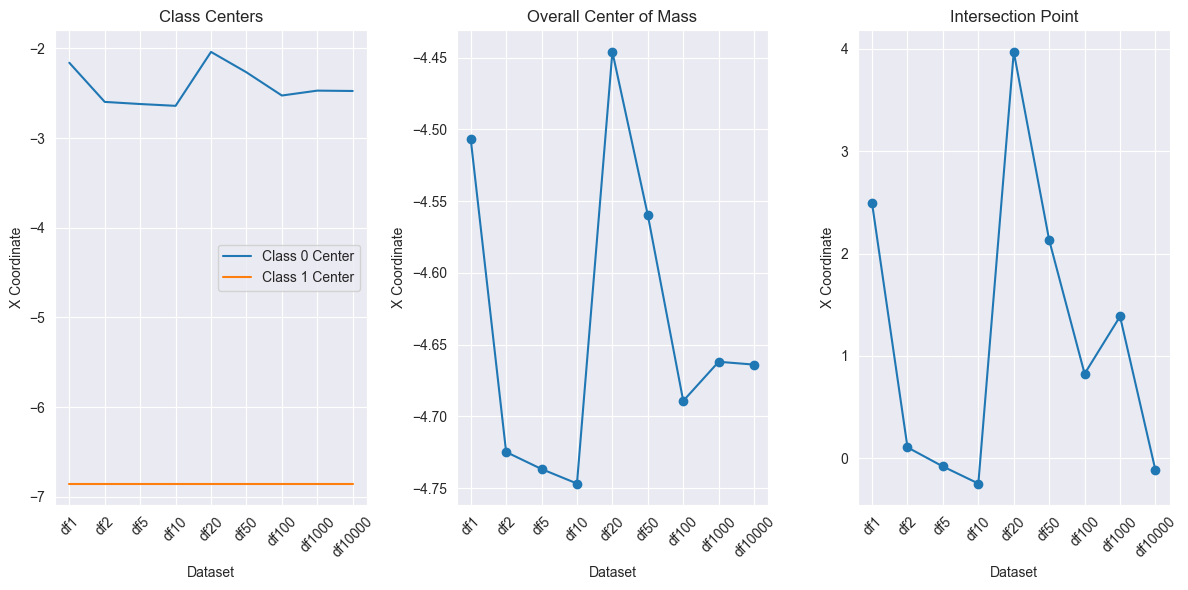

In [28]:
def calculate_centroids(df, class_labels):
    centers = {label: df[df['class'] == label][['feature_1', 'feature_2']].mean().values for label in class_labels}
    center_of_mass = np.mean([centers[label] for label in class_labels], axis=0)
    return centers, center_of_mass


def find_intersection_point(model, center1, center2):
    w = model.coef_[0]
    b = model.intercept_[0]

    m = (center2[1] - center1[1]) / (center2[0] - center1[0]) if center2[0] != center1[0] else np.inf
    c = center1[1] - m * center1[0]

    if m == np.inf:
        intersection_x = center1[0]
        intersection_y = - (w[0] * intersection_x + b) / w[1]
    else:
        intersection_x = (b - c) / (m - (w[1] / w[0]))
        intersection_y = m * intersection_x + c

    return np.array([intersection_x, intersection_y])


results = []

for name in datasets_to_analyze:
    df = additional_datasets[name]

    classes_to_compare = [0, 1]
    features_to_use = ['feature_1', 'feature_2']

    X = df[features_to_use].values
    y = df['class'].values

    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)

    centers, center_of_mass = calculate_centroids(df, classes_to_compare)
    intersection_point = find_intersection_point(lda, centers[0], centers[1])

    results.append({
        'dataset': name,
        'class_0_center': centers[0],
        'class_1_center': centers[1],
        'overall_center': center_of_mass,
        'intersection_point': intersection_point
    })

# Визуализация зависимостей
results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 6))

# Центры классов
plt.subplot(1, 3, 1)
plt.plot(results_df['dataset'], results_df['class_0_center'].apply(lambda x: x[0]), label='Class 0 Center')
plt.plot(results_df['dataset'], results_df['class_1_center'].apply(lambda x: x[0]), label='Class 1 Center')
plt.title('Class Centers')
plt.xlabel('Dataset')
plt.ylabel('X Coordinate')
plt.xticks(rotation=45)
plt.legend()

# Общий центр масс
plt.subplot(1, 3, 2)
plt.plot(results_df['dataset'], results_df['overall_center'].apply(lambda x: x[0]), label='Overall Center', marker='o')
plt.title('Overall Center of Mass')
plt.xlabel('Dataset')
plt.ylabel('X Coordinate')
plt.xticks(rotation=45)

# Точка пересечения
plt.subplot(1, 3, 3)
plt.plot(results_df['dataset'], results_df['intersection_point'].apply(lambda x: x[0]), label='Intersection Point',
         marker='o')
plt.title('Intersection Point')
plt.xlabel('Dataset')
plt.ylabel('X Coordinate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


[7] Выбрать целевой класс для решений из пункта [4].
Для каждого из решений из пункта [4]:
- Построить ROC кривую и рассчитать метрику AUROC.
- Построить PR кривую и рассчитать метрику AUPRC.
- (*) Построить PRgain кривую и рассчитать метрику AUPRgainC.

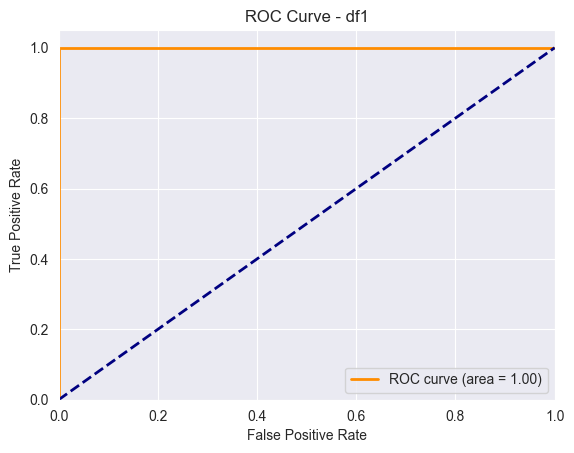

Dataset: df1, AUROC: 1.0000


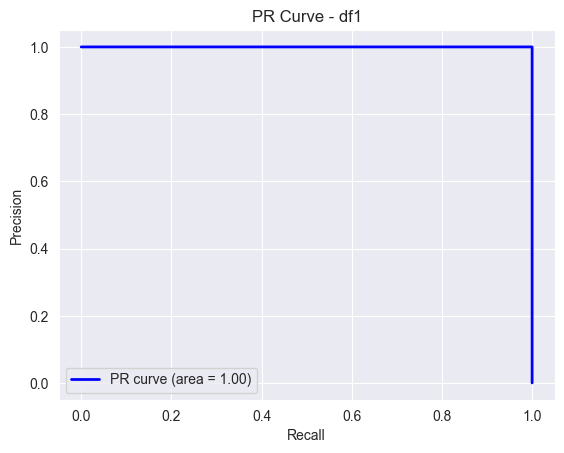

Dataset: df1, AUPRC: 1.0000


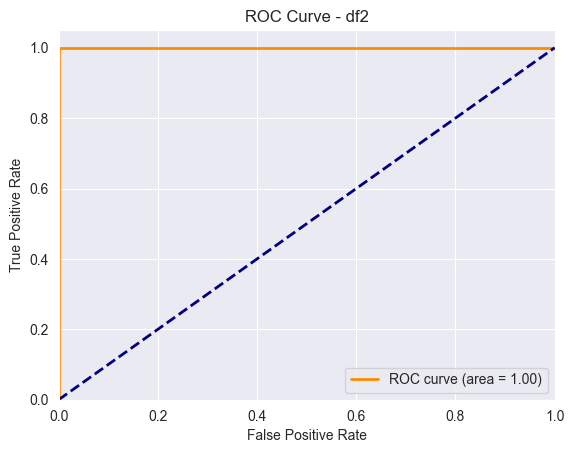

Dataset: df2, AUROC: 1.0000


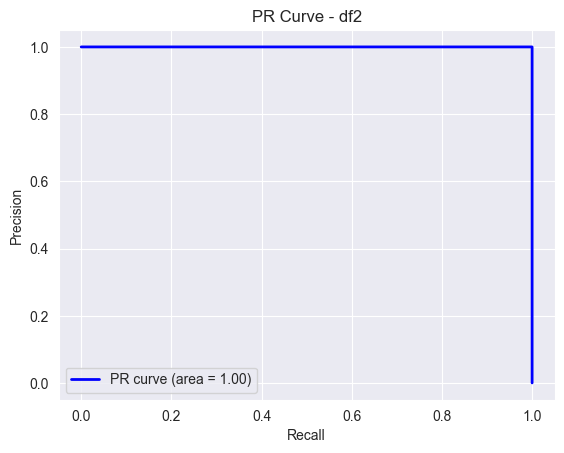

Dataset: df2, AUPRC: 1.0000


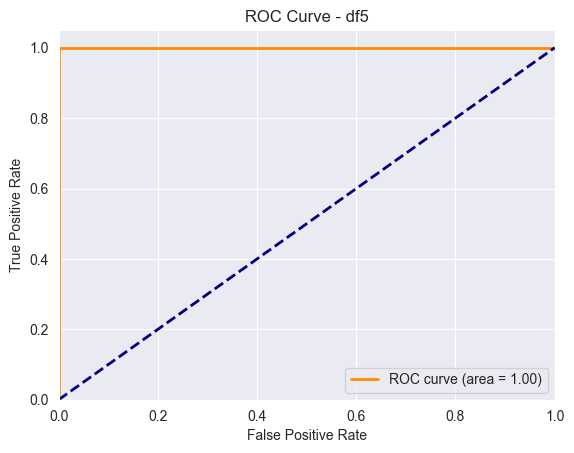

Dataset: df5, AUROC: 1.0000


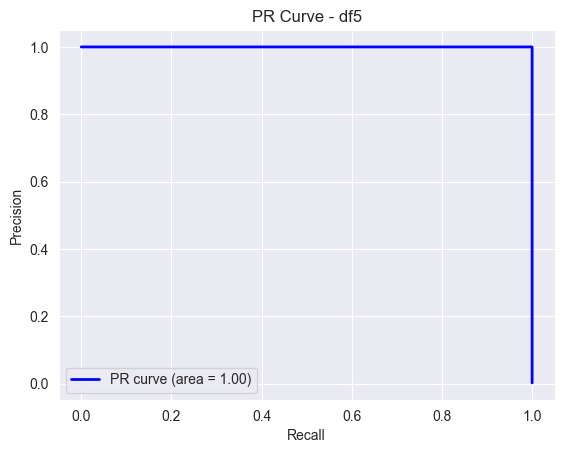

Dataset: df5, AUPRC: 1.0000


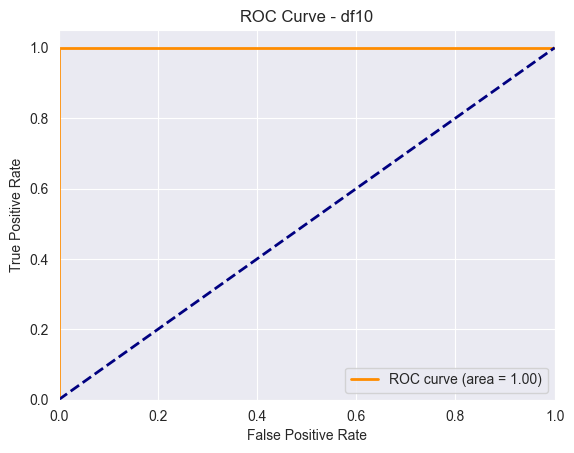

Dataset: df10, AUROC: 1.0000


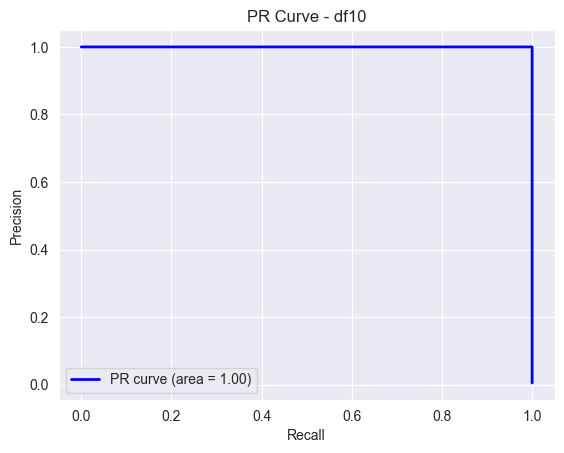

Dataset: df10, AUPRC: 1.0000


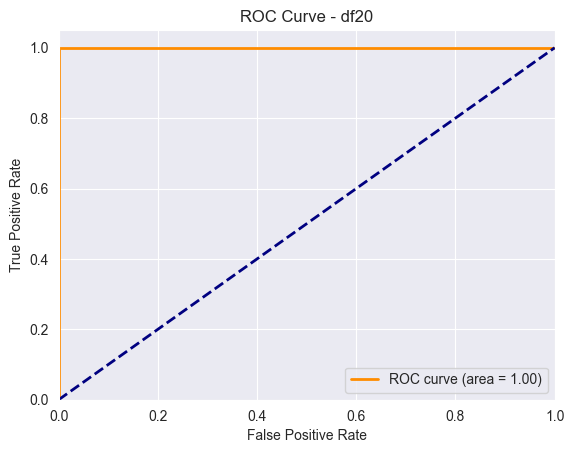

Dataset: df20, AUROC: 1.0000


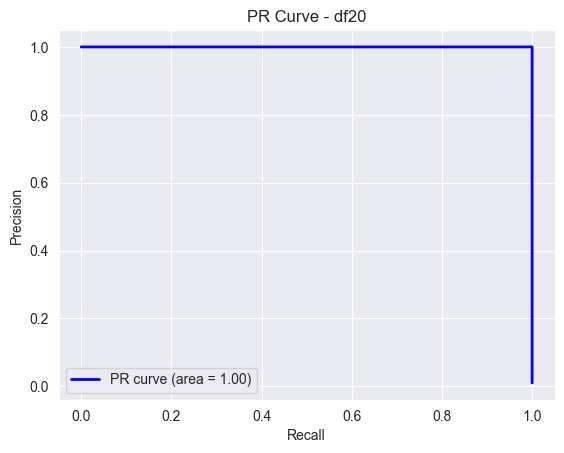

Dataset: df20, AUPRC: 1.0000


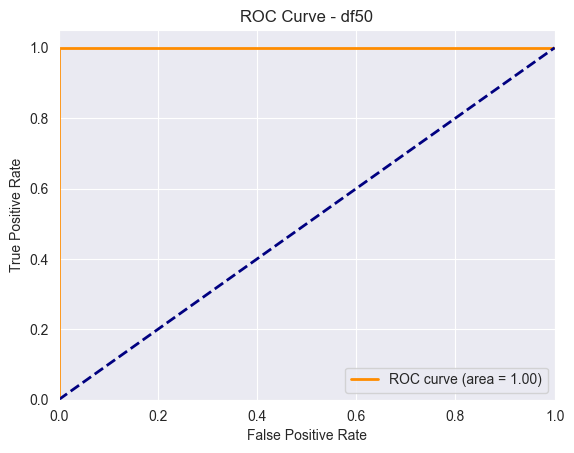

Dataset: df50, AUROC: 1.0000


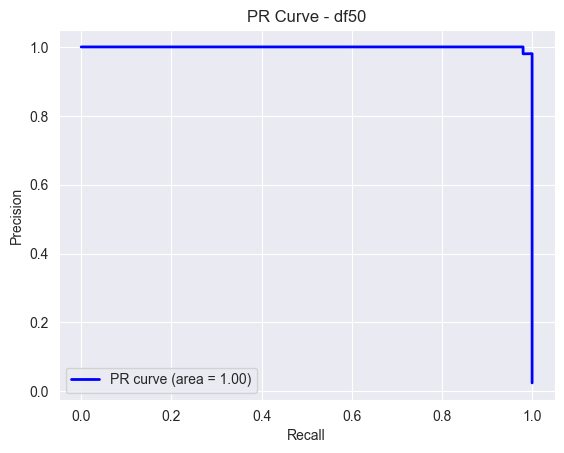

Dataset: df50, AUPRC: 0.9996


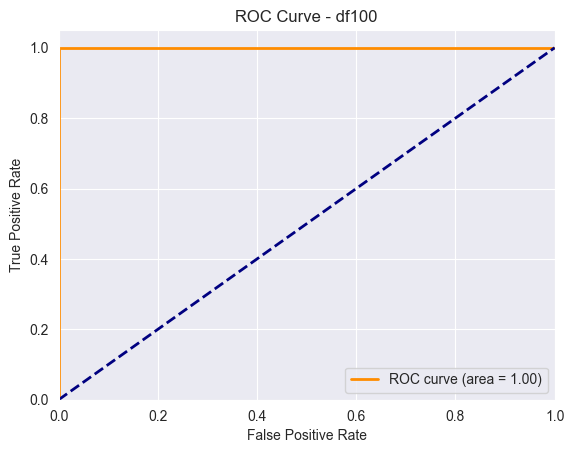

Dataset: df100, AUROC: 1.0000


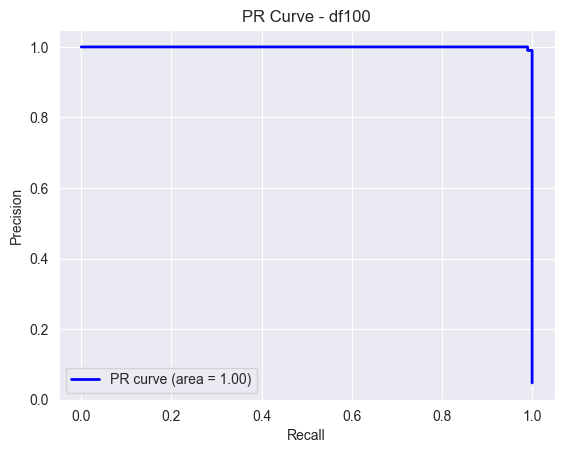

Dataset: df100, AUPRC: 0.9999


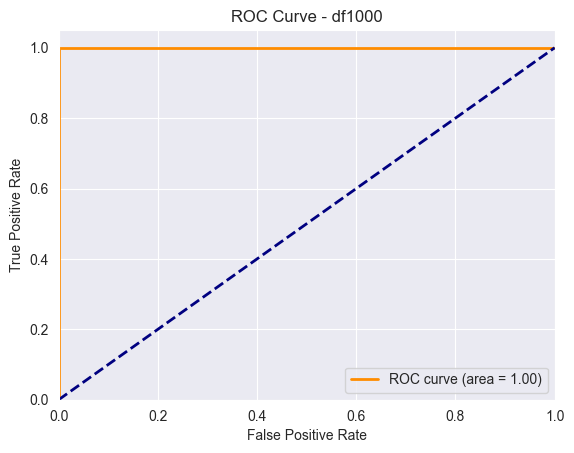

Dataset: df1000, AUROC: 1.0000


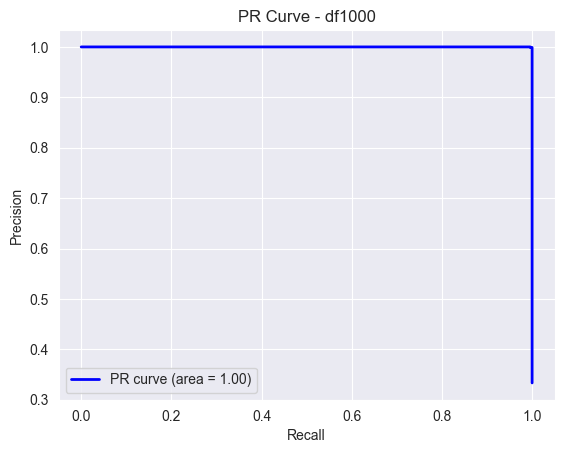

Dataset: df1000, AUPRC: 1.0000


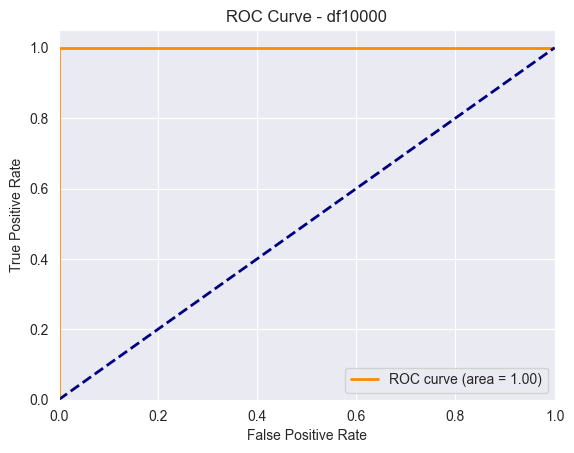

Dataset: df10000, AUROC: 1.0000


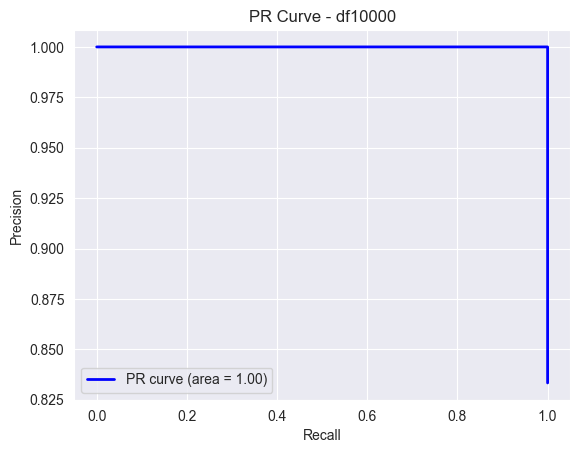

Dataset: df10000, AUPRC: 1.0000


In [29]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np
import matplotlib.pyplot as plt


def plot_roc_curve(y_true, y_scores, title):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc


def plot_pr_curve(y_true, y_scores, title):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = average_precision_score(y_true, y_scores)

    plt.figure()
    plt.plot(recall, precision, color='b', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc="lower left")
    plt.show()

    return pr_auc


def calculate_prgain(precision, recall, base_rate):
    precision_gain = (precision - base_rate) / (1 - base_rate)
    recall_gain = recall
    return precision_gain, recall_gain


def plot_prgain_curve(y_true, y_scores, title):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    base_rate = np.sum(y_true) / len(y_true)  # Доля положительных объектов

    precision_gain, recall_gain = calculate_prgain(precision, recall, base_rate)

    plt.figure()
    plt.plot(recall_gain, precision_gain, color='g', lw=2, label='PRgain curve')
    plt.xlabel('Recall gain')
    plt.ylabel('Precision gain')
    plt.title(title)
    plt.legend(loc="lower left")
    plt.show()

    # Вычисление AUPRgain через численное интегрирование
    auprgain = np.trapz(precision_gain, recall_gain)

    return auprgain


# Пример использования для каждого из датасетов
datasets_to_analyze = ['df1', 'df2', 'df5', 'df10', 'df20', 'df50', 'df100', 'df1000', 'df10000']

for name in datasets_to_analyze:
    df = additional_datasets[name]

    # Целевой класс
    target_class = 0  # Выбираем класс 0 в качестве целевого
    X = df[['feature_1', 'feature_2']].values
    y = (df['class'] == target_class).astype(int)

    # Применяем LDA (или можно использовать обученную модель)
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    y_scores = lda.decision_function(X)

    # ROC кривая и AUROC
    auroc = plot_roc_curve(y, y_scores, f'ROC Curve - {name}')
    print(f'Dataset: {name}, AUROC: {auroc:.4f}')

    # PR кривая и AUPRC
    auprc = plot_pr_curve(y, y_scores, f'PR Curve - {name}')
    print(f'Dataset: {name}, AUPRC: {auprc:.4f}')

    # PRgain кривая и AUPRgainC
    # auprgain = plot_prgain_curve(y, y_scores, f'PRgain Curve - {name}')
    # auprgain = np.trapezoid(precision_gain, recall_gain)
    # Вычисление AUPRgain через численное интегрирование
    # print(f'Dataset: {name}, AUPRgainC: {auprgain:.4f}')


[8] В пункте [7] выбрать другой целевой класс.
- Построить ROC кривую и рассчитать метрику AUROC.
- Построить PR кривую и рассчитать метрику AUPRC.
- (*) Построить PRgain кривую и рассчитать метрику AUPRgainC.

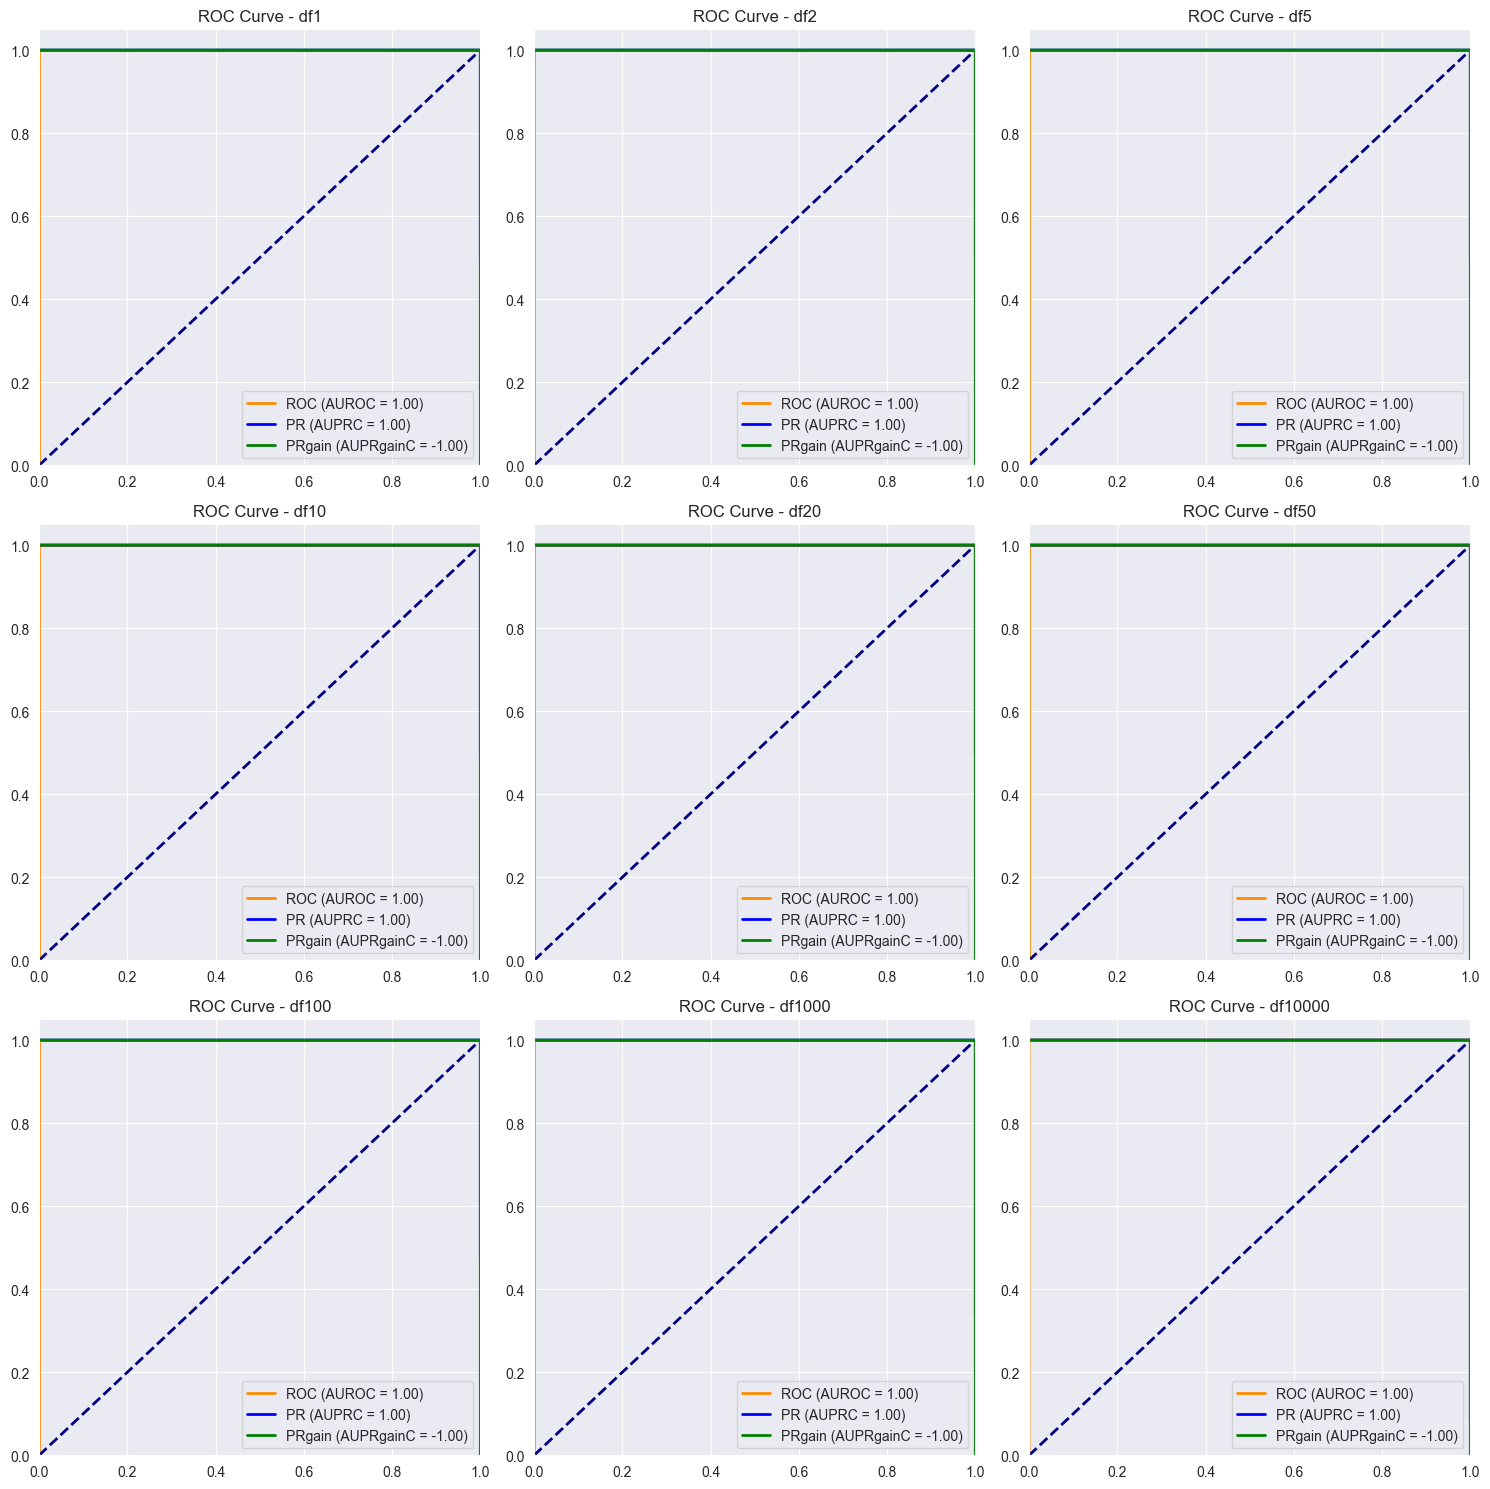

In [30]:
# Пример для другого целевого класса (например, класс 1)
target_class = 1  # Выбираем класс 1 в качестве целевого

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, name in enumerate(datasets_to_analyze):
    df = additional_datasets[name]

    X = df[['feature_1', 'feature_2']].values
    y = (df['class'] == target_class).astype(int)

    # Применяем LDA
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    y_scores = lda.decision_function(X)

    # ROC кривая и AUROC
    fpr, tpr, _ = roc_curve(y, y_scores)
    auroc = roc_auc_score(y, y_scores)
    axs[i // 3, i % 3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUROC = {auroc:.2f})')
    axs[i // 3, i % 3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i // 3, i % 3].set_title(f'ROC Curve - {name}')
    axs[i // 3, i % 3].set_xlim([0.0, 1.0])
    axs[i // 3, i % 3].set_ylim([0.0, 1.05])

    # PR кривая и AUPRC
    precision, recall, _ = precision_recall_curve(y, y_scores)
    pr_auc = average_precision_score(y, y_scores)
    axs[i // 3, i % 3].plot(recall, precision, color='b', lw=2, label=f'PR (AUPRC = {pr_auc:.2f})')

    # PRgain кривая и AUPRgainC
    base_rate = np.sum(y) / len(y)
    precision_gain, recall_gain = calculate_prgain(precision, recall, base_rate)
    # auprgain = np.trapezoid(precision_gain, recall_gain)
    auprgain = np.trapz(precision_gain, recall_gain)
    axs[i // 3, i % 3].plot(recall_gain, precision_gain, color='g', lw=2, label=f'PRgain (AUPRgainC = {auprgain:.2f})')

    axs[i // 3, i % 3].legend(loc="lower right")

plt.tight_layout()
plt.show()

[9] Для датасета 10k на основе 3-fold, 5-fold, 10-fold, 20-fold, 50-fold, 100-fold кроссвалидации построить кривые AUROC и AUPRC c доверительными интервалами (CI95). Вместо CI95 можно взять CI90, CI80 или другой вариант доверительного интервала.


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Определение предиктора
predictor = LogisticRegression()


# Функции для бутстреппинга
def bootstrap_metric(y_real, y_proba, metric_func, n_bootstraps=1000, ci=95):
    rng = np.random.RandomState(42)
    scores = [metric_func(y_real[rng.randint(0, len(y_real), len(y_real))],
                          y_proba[rng.randint(0, len(y_proba), len(y_proba))])
              for _ in range(n_bootstraps)
              if len(np.unique(y_real[rng.randint(0, len(y_real), len(y_real))])) > 1]
    return np.percentile(scores, [(100 - ci) / 2, 100 - (100 - ci) / 2])


# Построение кривых
def plot_curves(df, k, ci_level=95):
    df = df[df['class'].isin([0, 1])]
    X = df[['feature_1', 'feature_2']]
    y = df['class']

    skf = StratifiedKFold(n_splits=k)
    y_real, y_proba = [], []

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # Для каждого фолда
    for i, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        predictor.fit(X.iloc[train_idx], y.iloc[train_idx])
        y_real_fold = y.iloc[test_idx]
        y_proba_fold = predictor.predict_proba(X.iloc[test_idx])[:, 1]

        y_real.append(y_real_fold)
        y_proba.append(y_proba_fold)

        # Построение индивидуальных кривых для каждого фолда
        # ROC кривая для каждого фолда
        fpr_fold, tpr_fold, _ = roc_curve(y_real_fold, y_proba_fold)
        roc_auc_fold = auc(fpr_fold, tpr_fold)
        ax1.plot(fpr_fold, tpr_fold, lw=1, alpha=0.6, )  # label=f'Fold {i+1} (AUROC={roc_auc_fold:.2f})')

        # PR кривая для каждого фолда
        precision_fold, recall_fold, _ = precision_recall_curve(y_real_fold, y_proba_fold)
        pr_auc_fold = auc(recall_fold, precision_fold)
        ax2.plot(recall_fold, precision_fold, lw=1, alpha=0.6, )  # label=f'Fold {i+1} (AUPRC={pr_auc_fold:.2f})')

    # Объединяем результаты всех фолдов
    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)

    # ROC и AUPRC для всех фолдов
    fpr, tpr, _ = roc_curve(y_real, y_proba)
    roc_auc = auc(fpr, tpr)
    precision, recall, _ = precision_recall_curve(y_real, y_proba)
    pr_auc = auc(recall, precision)

    # Бутстреппинг для доверительных интервалов
    roc_ci = bootstrap_metric(y_real, y_proba, lambda y, p: auc(roc_curve(y, p)[0], roc_curve(y, p)[1]), ci=ci_level)
    pr_ci = bootstrap_metric(y_real, y_proba,
                             lambda y, p: auc(precision_recall_curve(y, p)[1], precision_recall_curve(y, p)[0]),
                             ci=ci_level)

    # Построение итоговых ROC и PR кривых
    ax1.plot(fpr, tpr, color='red', lw=2, label=f'Overall AUROC={roc_auc:.4f}')
    ax1.fill_between(fpr, np.maximum(tpr - 0.1, 0), np.minimum(tpr + 0.1, 1), alpha=0.2, color='grey',
                     label=f'95% CI [{roc_ci[0]:.4f}, {roc_ci[1]:.4f}]')
    ax1.set_title(f"ROC Curve (CI {ci_level}%, {k}-fold)")
    ax1.set_xlabel("False Positive Rate")
    ax1.set_ylabel("True Positive Rate")
    ax1.legend(loc='lower right')

    ax2.plot(recall, precision, color='red', lw=2, label=f'Overall AUPRC={pr_auc:.4f}')
    ax2.fill_between(recall, np.maximum(precision - 0.1, 0), np.minimum(precision + 0.1, 1), alpha=0.2, color='grey',
                     label=f'95% CI [{pr_ci[0]:.4f}, {pr_ci[1]:.4f}]')
    ax2.set_title(f"PR Curve (CI {ci_level}%, {k}-fold)")
    ax2.set_xlabel("Recall")
    ax2.set_ylabel("Precision")
    ax2.legend(loc='lower left')

    plt.tight_layout()
    plt.show()

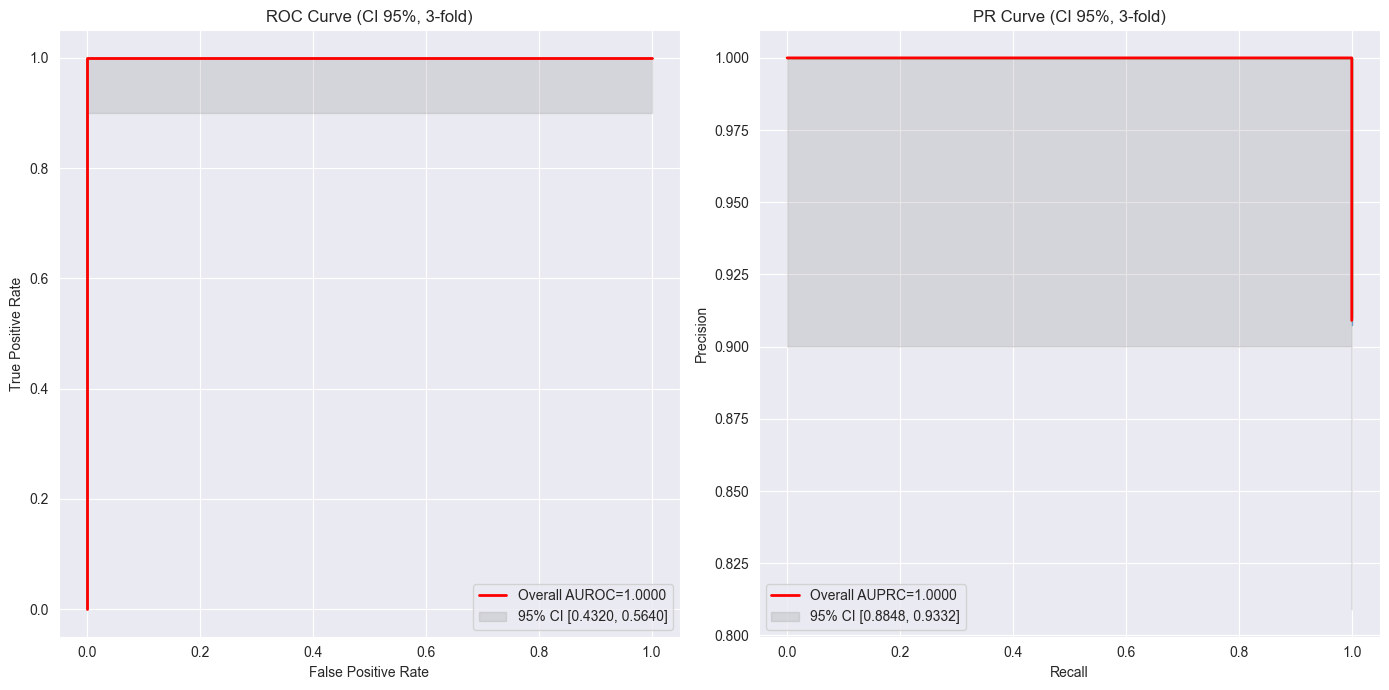

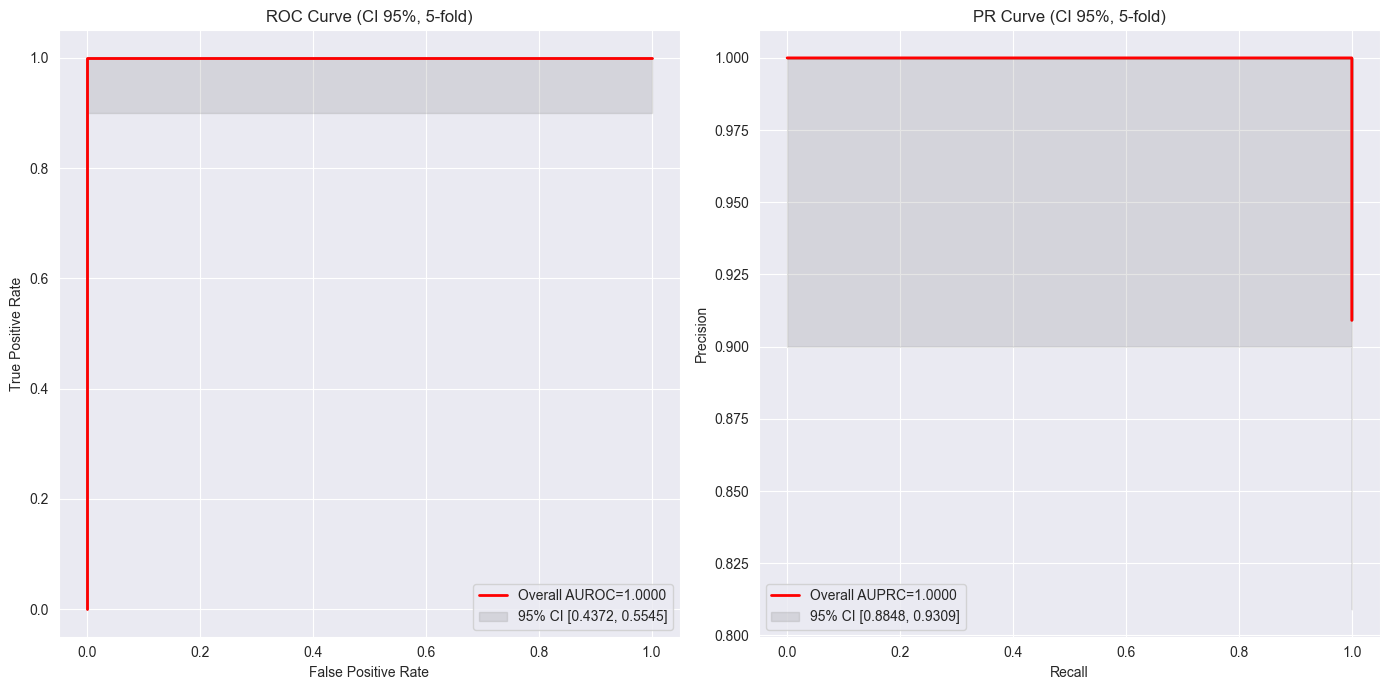

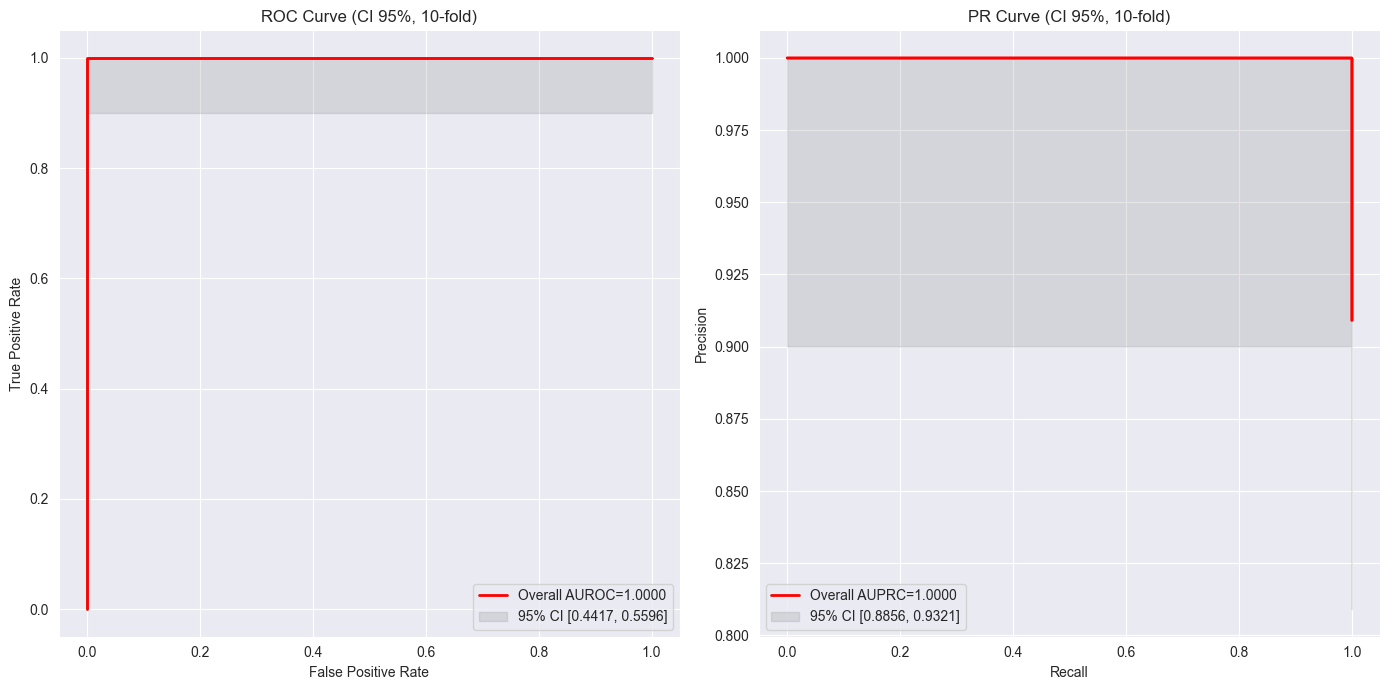

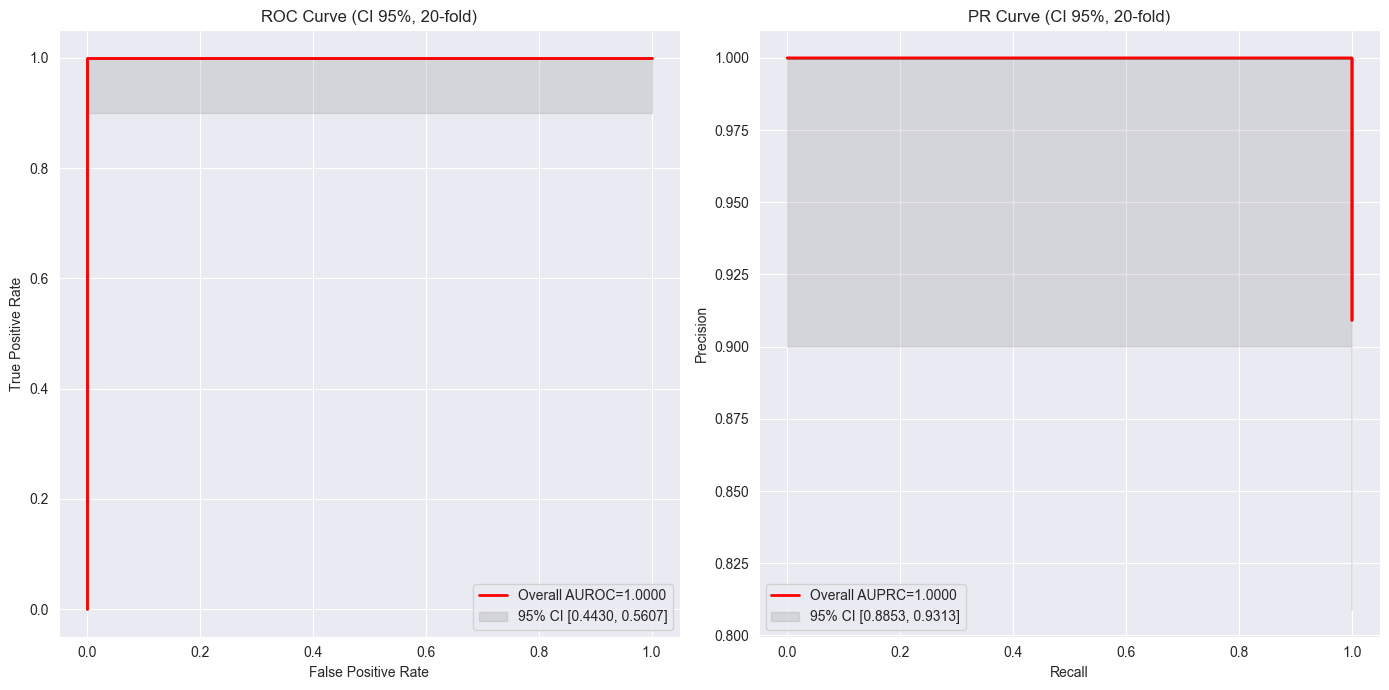

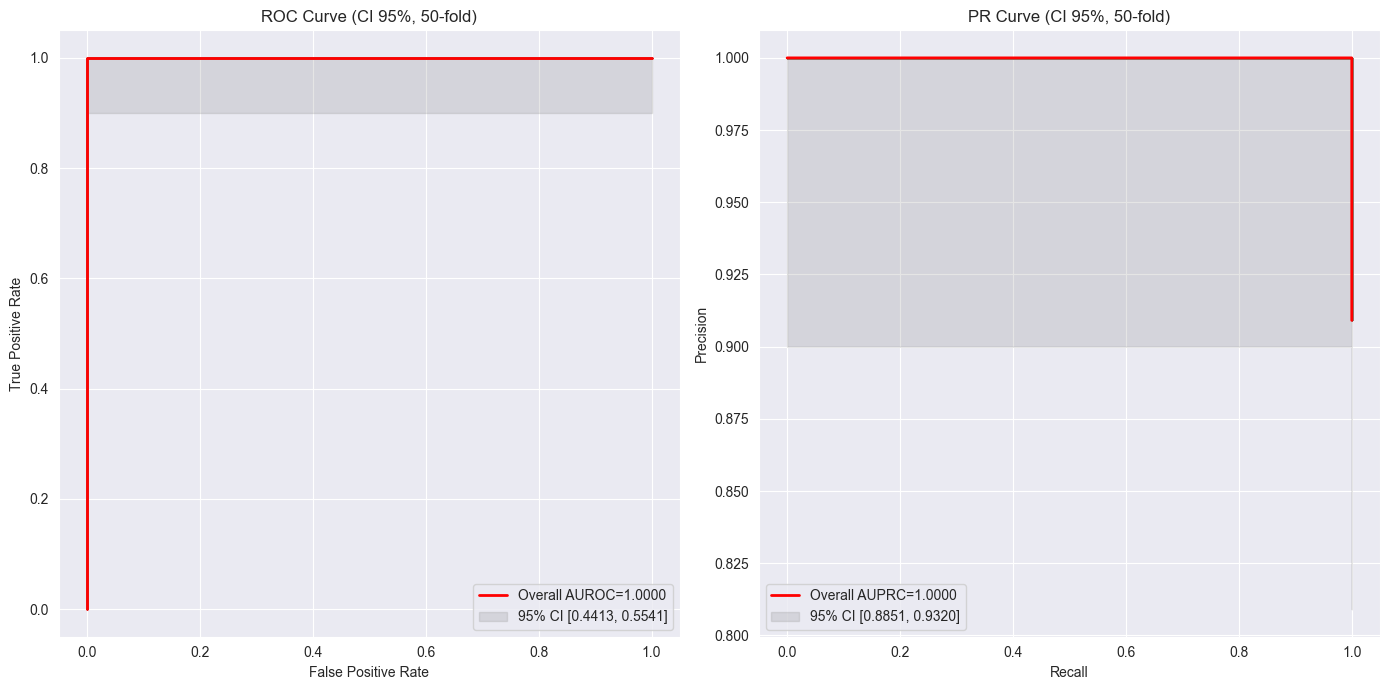

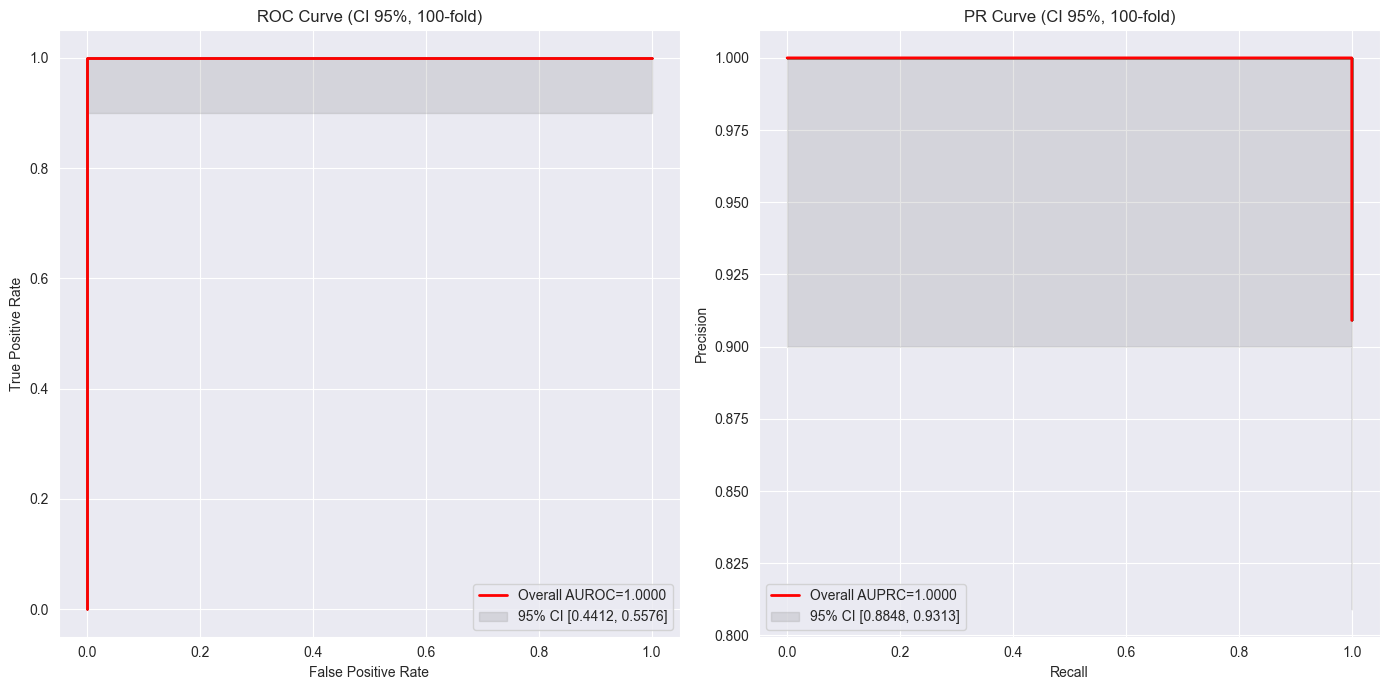

In [32]:
df100 = additional_datasets['df100']
folds = [3, 5, 10, 20, 50, 100]
for k in folds:
    plot_curves(df100, k, ci_level=95)

Кривые получились идеальные, но фолды не видно, так как на них наложилась Overall кривая